Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

Importación de datos

In [108]:
data = pd.read_csv('shopping_trends.csv')

Mostramos los datos

In [109]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


Vemos los Data types y si hay valores nulos

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

Procesamos todos los datos con un labelEncoder para tener todos los Data type en formato numérico

In [111]:
# Vamos a convertir los datos con labelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in data:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   int64  
 3   Item Purchased            3900 non-null   int64  
 4   Category                  3900 non-null   int64  
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   int64  
 7   Size                      3900 non-null   int64  
 8   Color                     3900 non-null   int64  
 9   Season                    3900 non-null   int64  
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   int64  
 12  Payment Method            3900 non-null   int64  
 13  Shipping Type             3900 non-null   int64  
 14  Discount

Estandarizamos los datos, para que posteriormente el modelo trabaje con ellos

In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

df_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [114]:
df_scaled.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,-1.731607,0.718913,0.685994,-1.394144,-0.002002,-0.285629,-0.576399,-1.203814,-0.707620,1.349198,-0.907584,1.644294,-0.295206,-0.892178,1.151339,1.151339,-0.785831,1.471636,0.012575
1,-1.730719,-1.648629,0.685994,1.523236,-0.002002,0.178852,-0.436944,-1.203814,-0.015163,1.349198,-0.907584,1.644294,-1.472409,-0.892178,1.151339,1.151339,-1.616552,-0.894631,0.012575
2,-1.729830,0.390088,0.685994,-0.143839,-0.002002,0.558882,-0.297488,0.945854,-0.015163,-0.441163,-0.907584,1.644294,-0.883807,-0.303032,1.151339,1.151339,-0.162789,-0.303064,1.513849
3,-1.728942,-1.517099,0.685994,0.272930,1.113356,1.276716,0.957614,-0.128980,-0.015163,-0.441163,-0.349027,1.644294,0.881996,0.286113,1.151339,1.151339,1.637107,0.880069,1.513849
4,-1.728054,0.061263,0.685994,-1.394144,-0.002002,-0.454531,0.818159,-0.128980,1.231259,-0.441163,-1.466141,1.644294,-0.883807,-0.303032,1.151339,1.151339,0.391025,0.880069,-1.488699


Creo un modelo rfm con los datos que creo que pueden ser los óptimos para cada columna

In [115]:
df_rfm = data.groupby('Customer ID').agg(
    recency=('Previous Purchases', 'min'),
    frecuency = ('Frequency of Purchases', 'sum'),
    monetary = ('Purchase Amount (USD)', 'sum')
)

df_rfm.head()

,recency,frecuency,monetary
Customer ID,,,
1,14,3,53
2,2,3,64
3,23,6,73
4,49,6,90
5,31,0,49


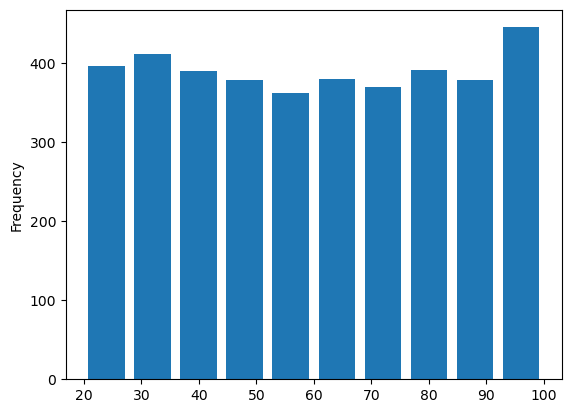

In [116]:
df_rfm.monetary.plot(kind='hist', bins=10, rwidth=0.8)
plt.show()

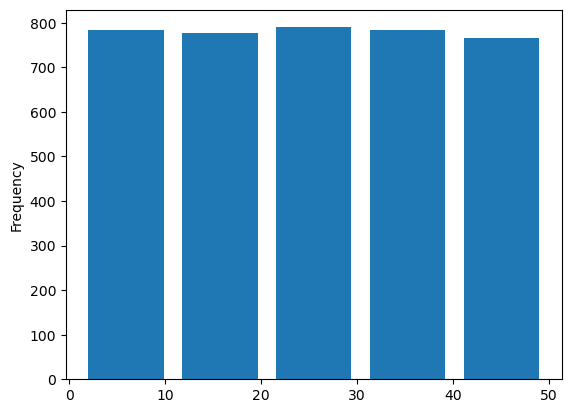

In [117]:
df_rfm.recency.plot(kind='hist', bins=5, rwidth=0.8)
plt.show()

<Axes: xlabel='recency', ylabel='monetary'>

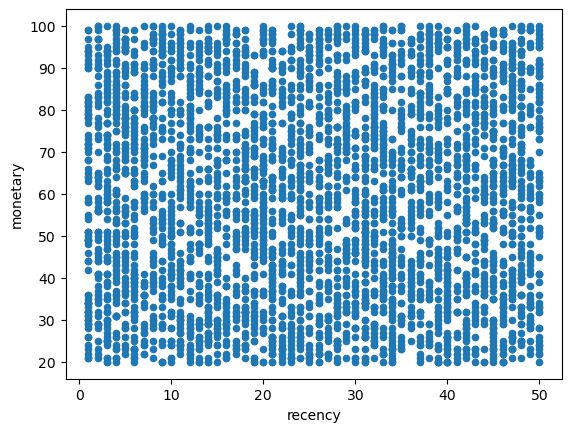

In [118]:
df_rfm.plot.scatter(x='recency', y='monetary')

<Axes: xlabel='recency', ylabel='frecuency'>

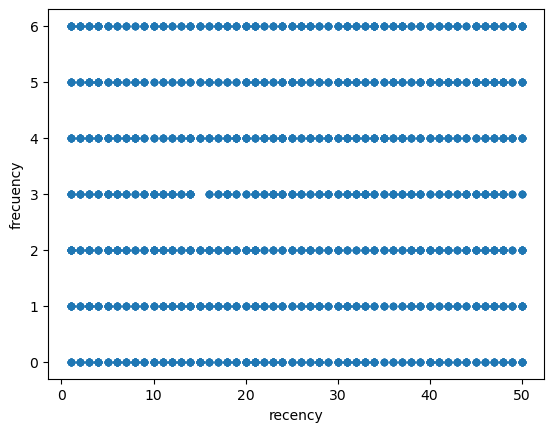

In [119]:
df_rfm.plot.scatter(x='recency', y='frecuency')

Mostramos el codo de Elbow para ver el número de cluster y donde empiezan los datos a tener un sesgo similar

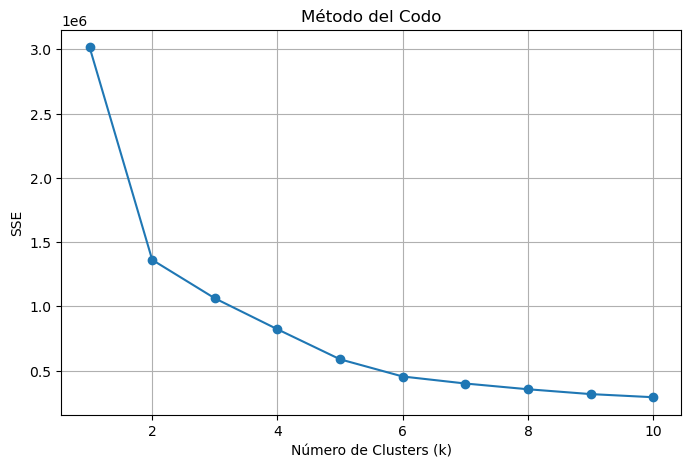

In [120]:
sse = []  # Lista para almacenar la suma de los errores cuadráticos (SSE)

# Rango de valores de k a evaluar
krange = range(1, 11)

for k in krange:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_rfm)  # Ajustar el modelo a los datos
    sse.append(kmeans.inertia_)  # Guardar el SSE para cada valor de k

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(krange, sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('SSE')
plt.grid()
plt.show()

Mostramos también el método de Silhouette en gráfico, aunque no se aprecia demasiado

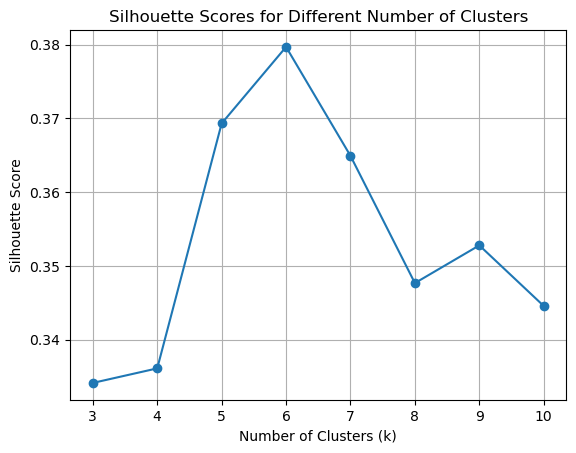

In [121]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

krange = list(range(3, 11))

for k in krange:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_rfm)
    silhouette_avg = silhouette_score(df_rfm, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar los resultados
plt.plot(krange, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

Repetimos el proceso de Elbow y Silhouette pero con todos los datos de la tabla en vez de con los del método rfm

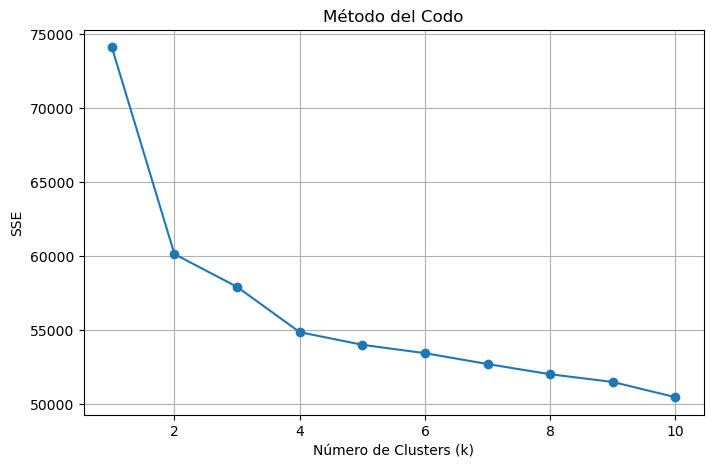

In [122]:
sse = []  # Lista para almacenar la suma de los errores cuadráticos (SSE)

# Rango de valores de k a evaluar
krange = range(1, 11)

for k in krange:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)  # Ajustar el modelo a los datos
    sse.append(kmeans.inertia_)  # Guardar el SSE para cada valor de k

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(krange, sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('SSE')
plt.grid()
plt.show()

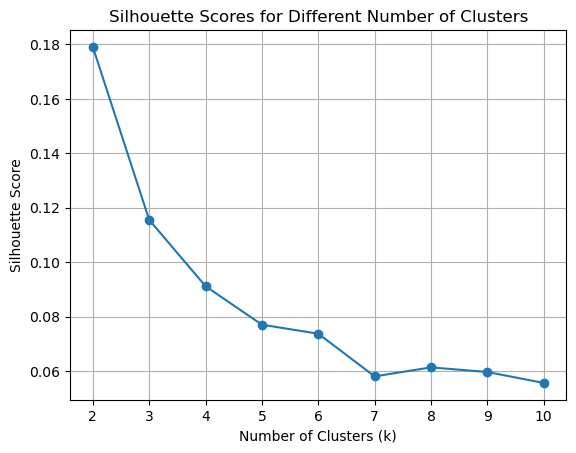

In [123]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

krange = list(range(2, 11))

for k in krange:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar los resultados
plt.plot(krange, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

#### Ahora vamos a visualizar mejor el coeficiente para ver que datos deberíamos usar para hacer los clusters

Para n_clusters = 2 El coeficiente de silueta promedio es: 0.4553963368438376
Para n_clusters = 3 El coeficiente de silueta promedio es: 0.39777637565017443
Para n_clusters = 4 El coeficiente de silueta promedio es: 0.3638300267988924
Para n_clusters = 5 El coeficiente de silueta promedio es: 0.3780487690106318
Para n_clusters = 6 El coeficiente de silueta promedio es: 0.3796549273933426


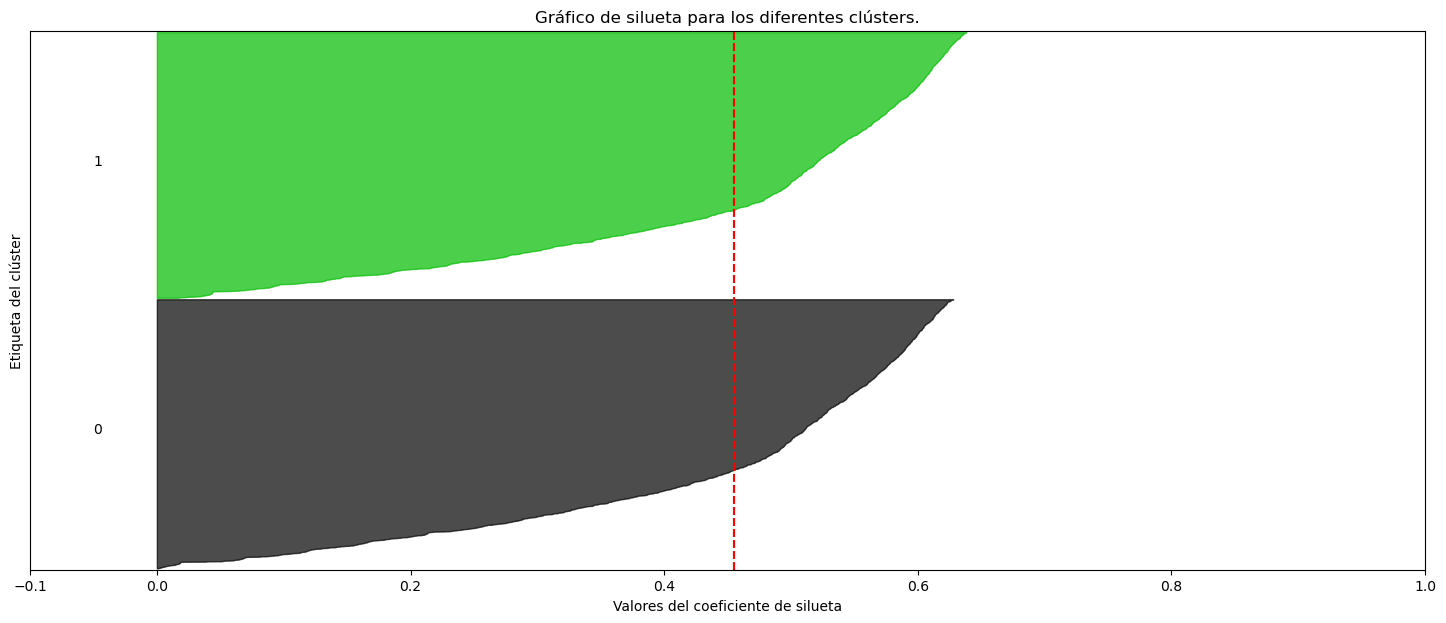

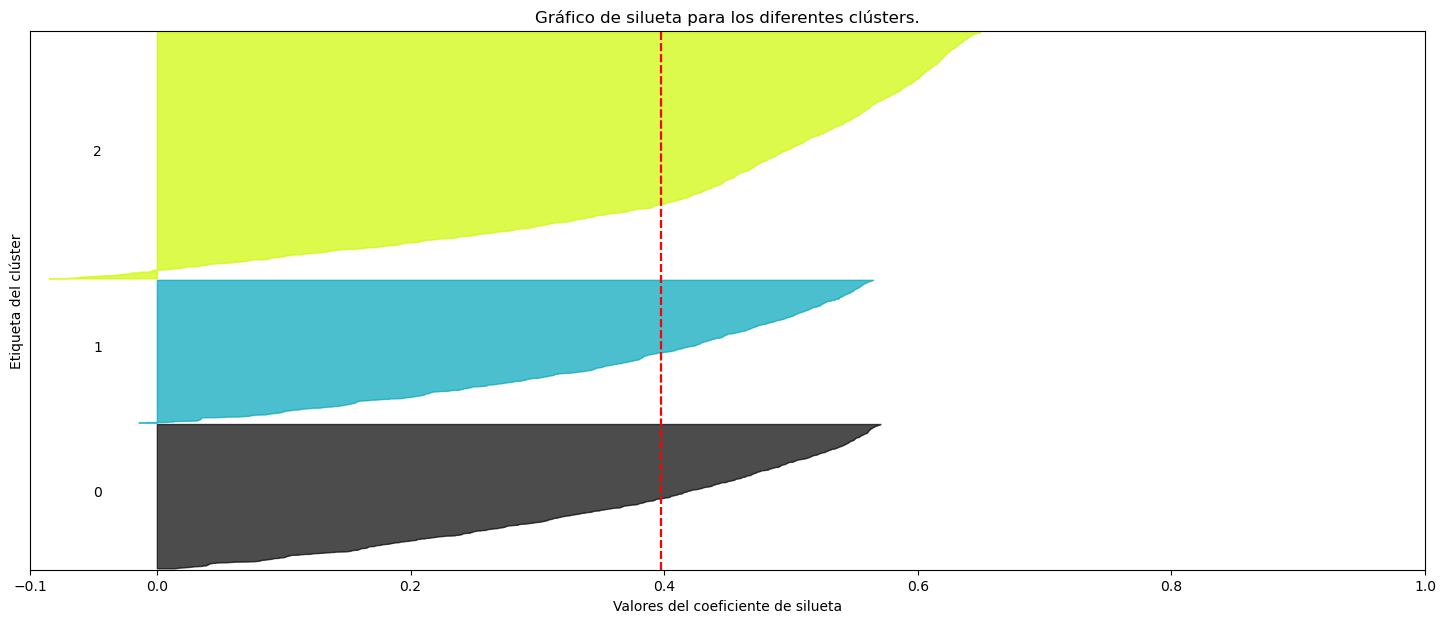

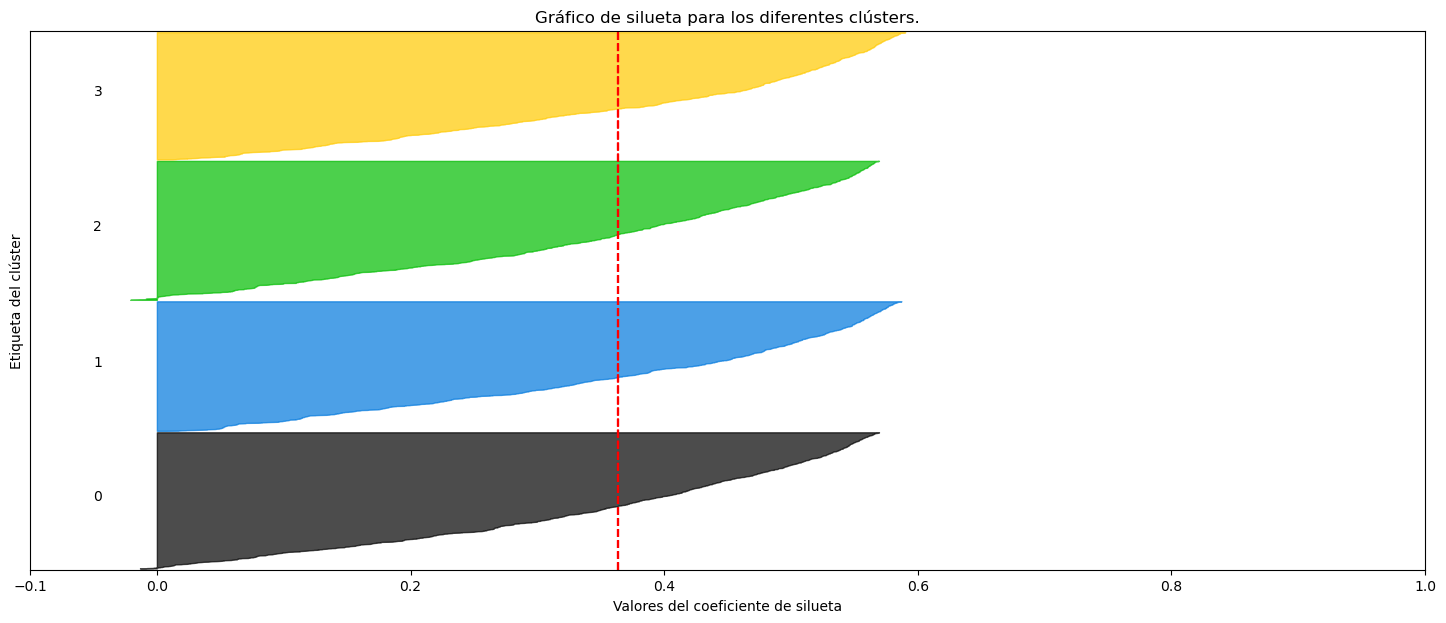

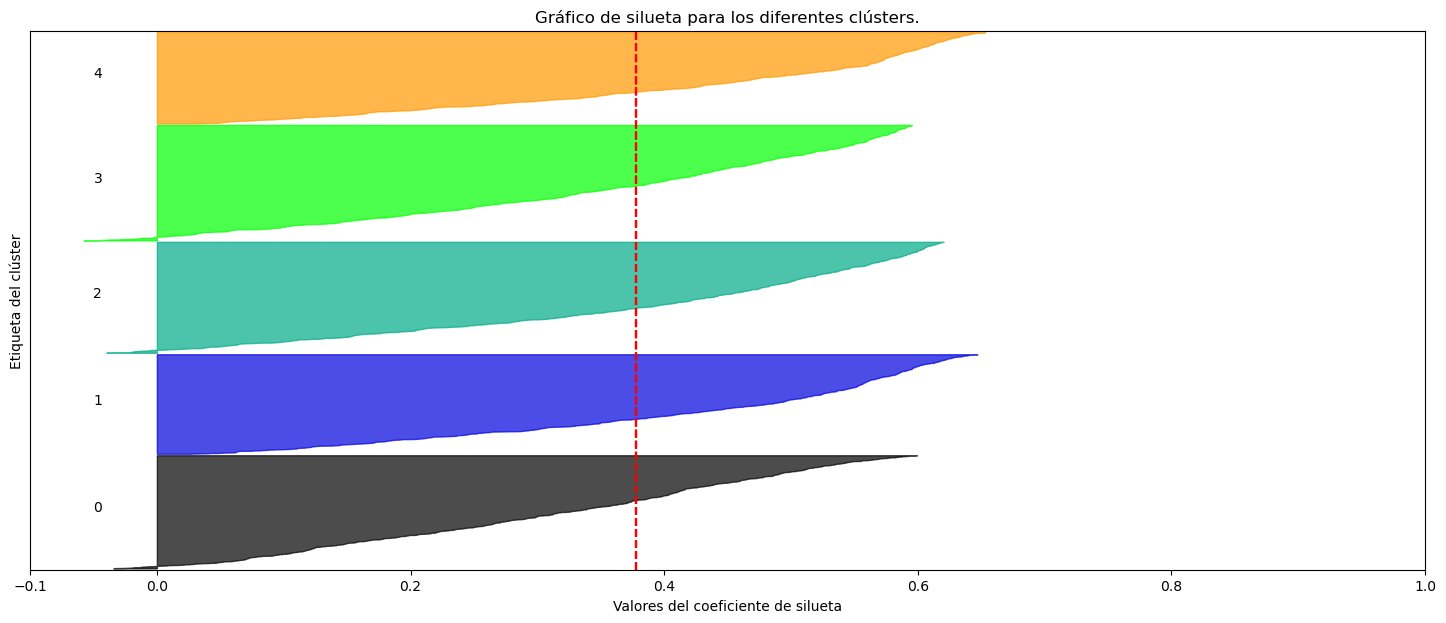

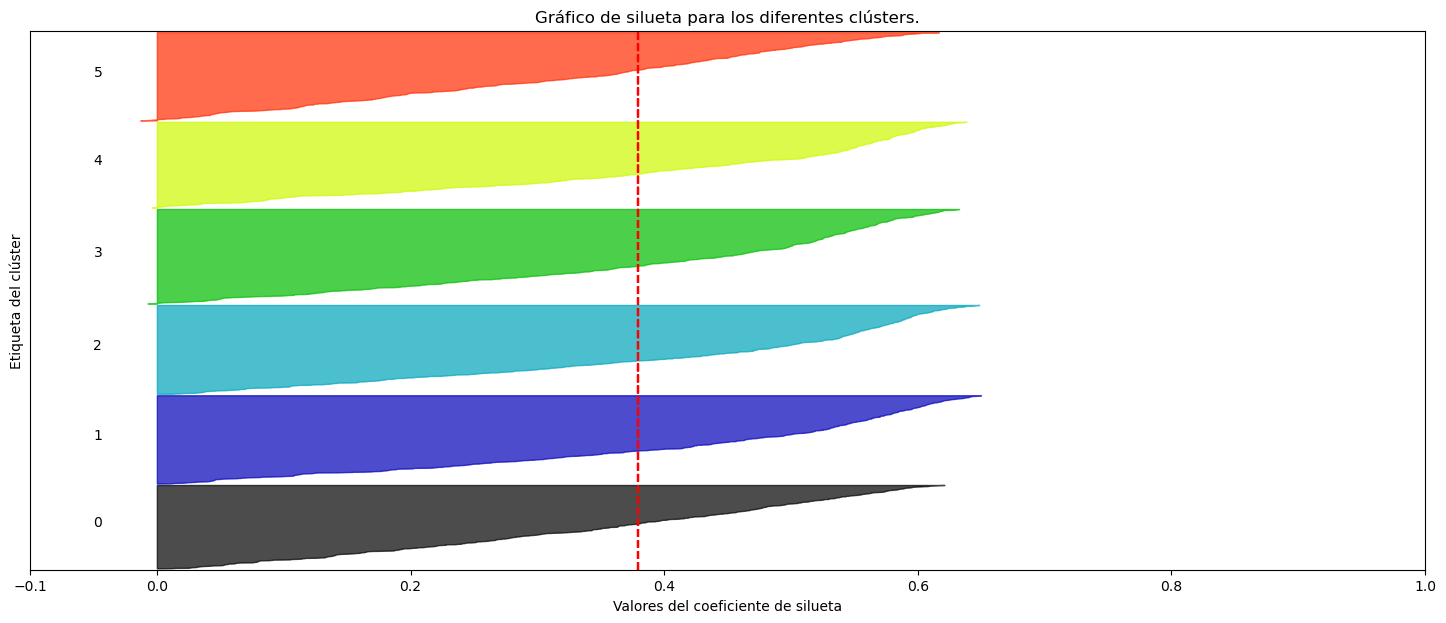

In [124]:
# Comentario sobre el Código para Visualizar el Coeficiente de Silueta para Diferentes Números de Clústers

# Definición de Variables:
range_n_clusters = [2,3, 4, 5, 6]  # Lista de valores de clústers a evaluar.
scores = []                      # Lista para almacenar los coeficientes de silueta.

# Función para Determinar el Número de Clústers con Coeficiente de Silueta:
def number_of_clusters_silhouette(datos):
    for n_clusters in range_n_clusters:
        # Crear una subtrama con 1 fila y 1 columna
        fig, (ax1) = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)
         
        # Configuración de la trama para el gráfico de silueta
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(datos) + (n_clusters + 1) * 10])
        
        # Inicializar el clusterer con el valor de n_clusters y una semilla aleatoria
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
        cluster_labels = clusterer.fit_predict(datos)
        
        # Calcular el coeficiente de silueta promedio
        silhouette_avg = silhouette_score(datos, cluster_labels)
        scores.append(silhouette_avg)
        print("Para n_clusters =", n_clusters,
              "El coeficiente de silueta promedio es:", silhouette_avg)
        
        # Calcular los valores de silueta para cada muestra
        sample_silhouette_values = silhouette_samples(datos, cluster_labels)
        
        # Configuración de variables para visualización
        y_lower = 10
        
        # Bucle para cada clúster
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            # Configuración de colores y relleno para el gráfico de silueta
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Etiquetar los gráficos de silueta con los números de clúster
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Actualizar la posición y_lower para el siguiente gráfico
            y_lower = y_upper + 10
    
            # Configuración de la trama
            ax1.set_title("Gráfico de silueta para los diferentes clústers.")
            ax1.set_xlabel("Valores del coeficiente de silueta")
            ax1.set_ylabel("Etiqueta del clúster")
        
            # Línea vertical punteada para el coeficiente de silueta promedio
            ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        
            # Limpiar las etiquetas / marcas del eje y
            ax1.set_yticks([])
            # Configurar marcas en el eje x
            ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Llamar a la función para visualizar el coeficiente de silueta
number_of_clusters_silhouette(df_rfm)


Para n_clusters = 2 El coeficiente de silueta promedio es: 0.17908212346176164
Para n_clusters = 3 El coeficiente de silueta promedio es: 0.11065783775840782
Para n_clusters = 4 El coeficiente de silueta promedio es: 0.09116273580697846
Para n_clusters = 5 El coeficiente de silueta promedio es: 0.07458560449845873
Para n_clusters = 6 El coeficiente de silueta promedio es: 0.07597224702850817


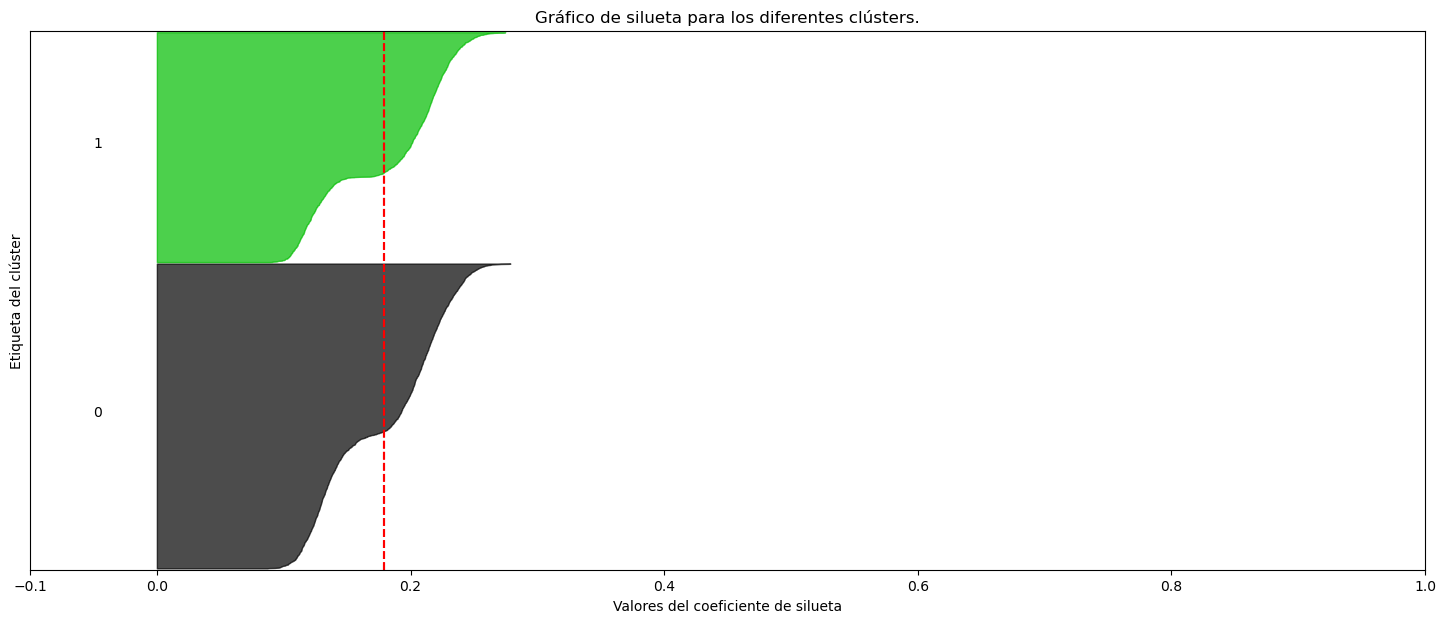

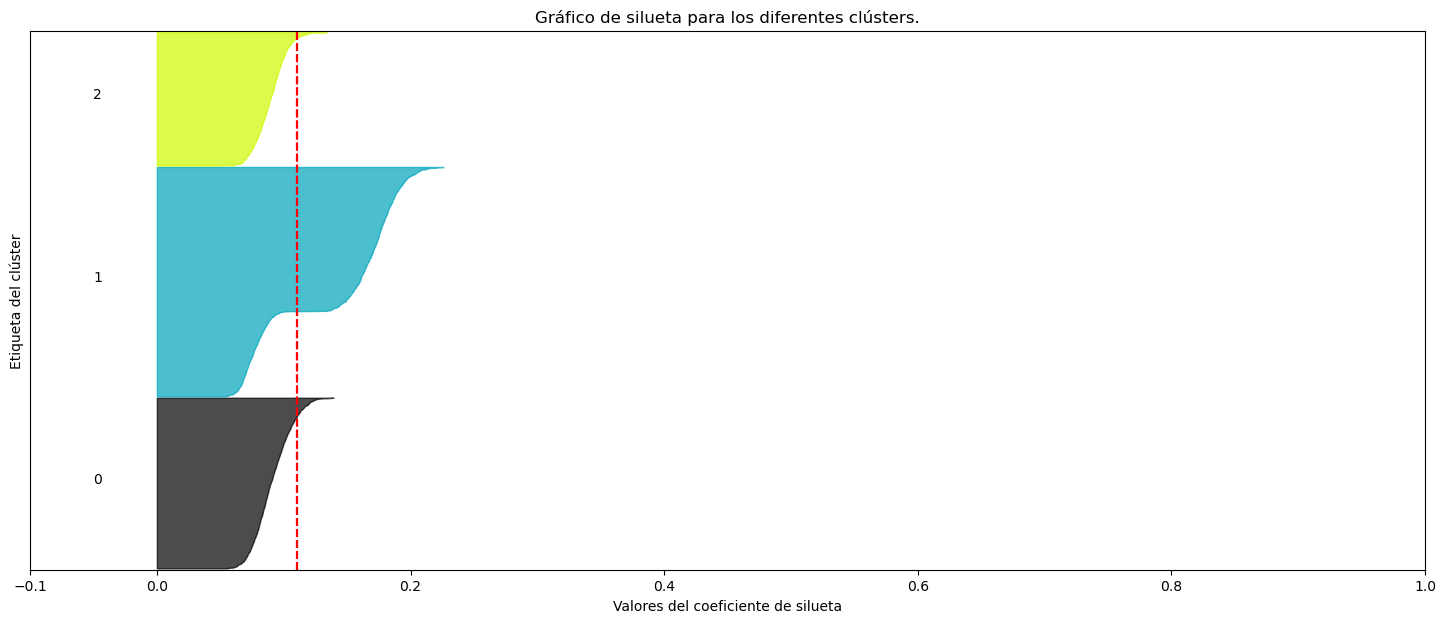

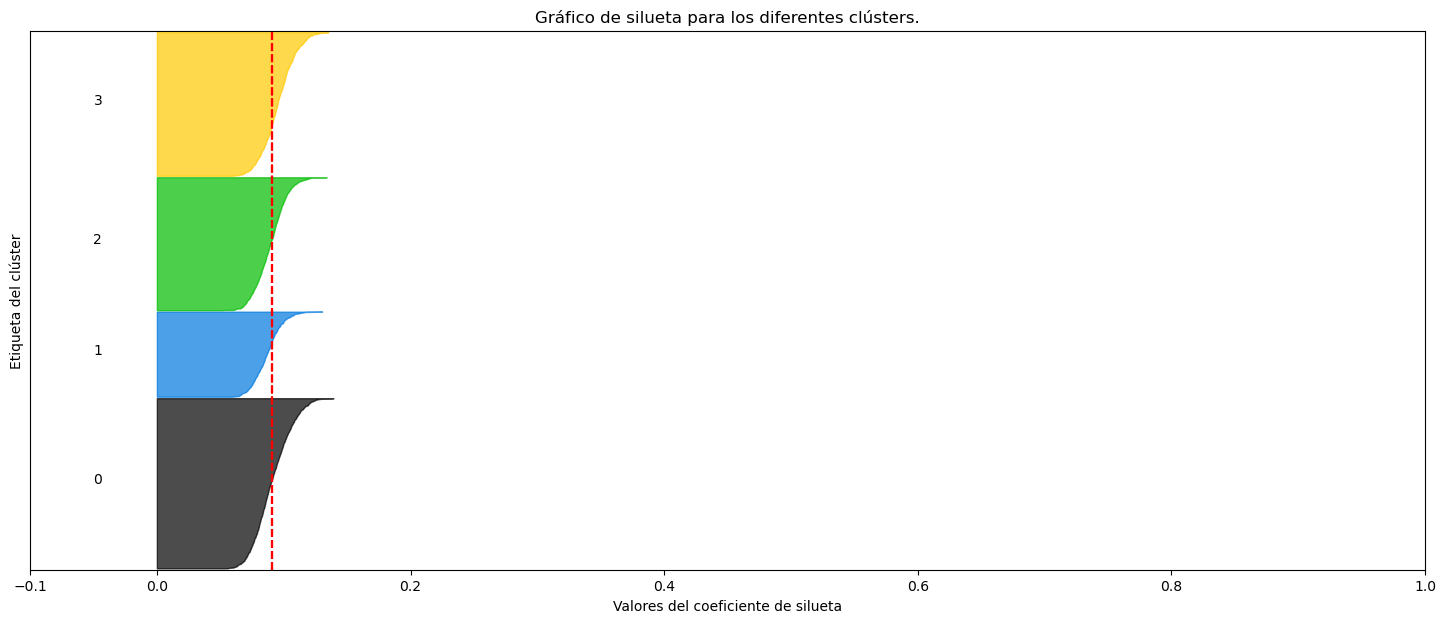

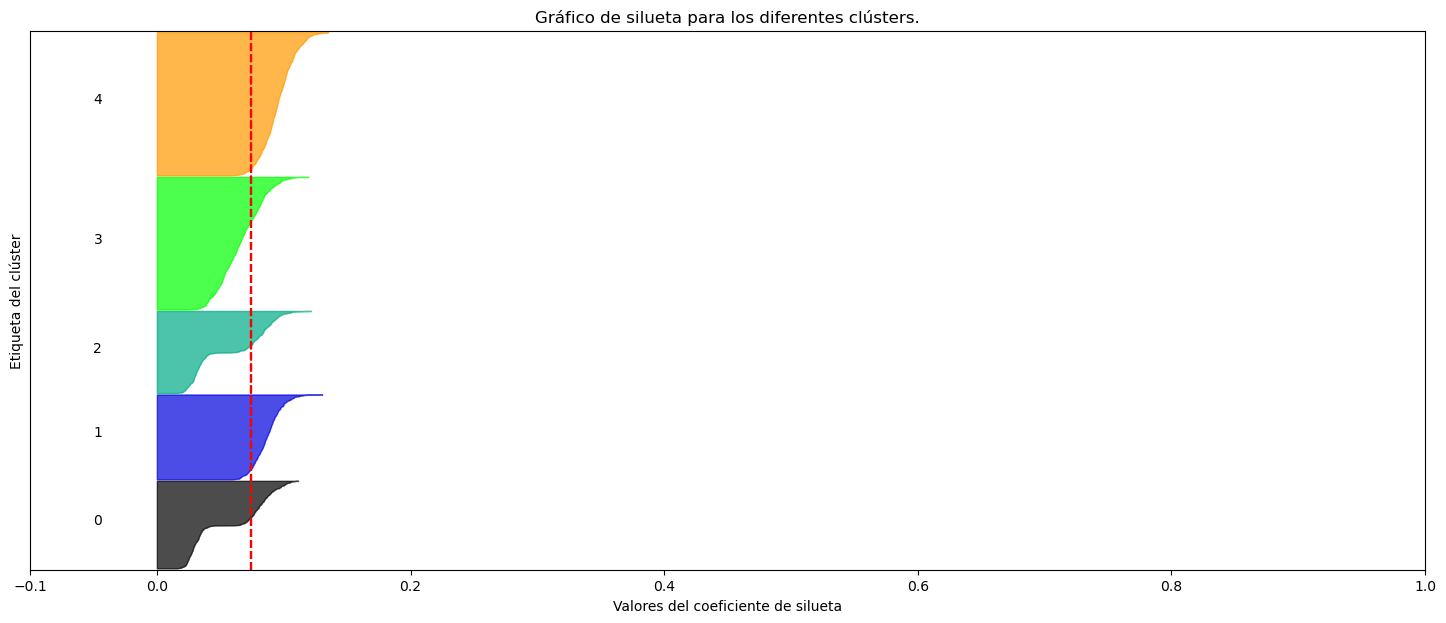

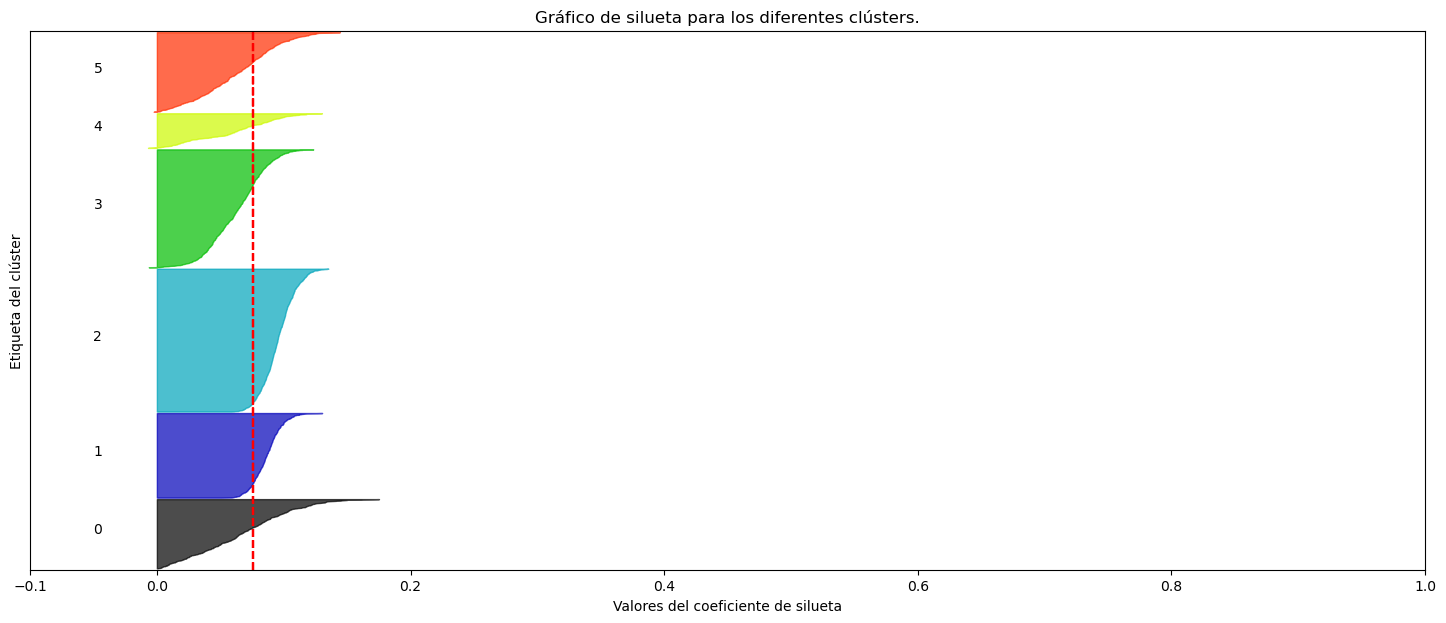

In [125]:
number_of_clusters_silhouette(data_scaled)

### Observamos que el modelo rfm parece una mejor opción para clusterizar los datos

### Vamos a utilizar el modelo rfm para nuestro kmeans

In [127]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init="auto")
kmeans.fit(df_rfm)

KMeans(n_clusters=6, random_state=42)

In [128]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([632, 696, 650, 655, 652, 615]))

In [129]:
print(dict(pd.Series(kmeans.labels_).value_counts()))

{1: np.int64(696), 3: np.int64(655), 4: np.int64(652), 2: np.int64(650), 0: np.int64(632), 5: np.int64(615)}


In [130]:
df_rfm['Cluster'] = kmeans.labels_

In [131]:
df_rfm['Cluster'] = df_rfm['Cluster'].astype('category')

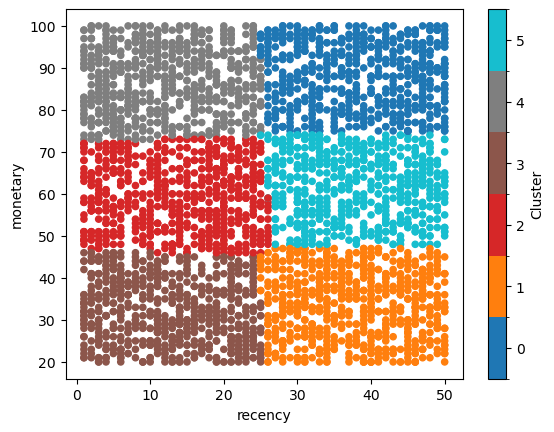

In [134]:
df_rfm.plot(x='recency', y='monetary', c='Cluster', kind='scatter', colormap='tab10')
plt.show()

In [135]:
df_rfm['Cluster'] = kmeans.labels_

In [136]:
df_rfm['Cluster'] = df_rfm['Cluster'].astype('category')

In [138]:
df_rfm.groupby('Cluster').agg(
    recency = ('recency', 'mean'), 
    frecuency = ('frecuency', 'mean'),
    monetary = ('monetary', 'mean'),
    cluster_size = ('monetary', 'count')
).round(1).sort_values(by = 'recency')

C:\Users\alejandro.regueiroru\AppData\Local\Temp\ipykernel_10936\2016217373.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_rfm.groupby('Cluster').agg(


,recency,frecuency,monetary,cluster_size
Cluster,,,,
4,12.2,2.9,86.8,652
3,12.7,2.9,32.2,655
2,13.9,2.9,59.5,650
1,37.5,3.1,33.6,696
5,37.9,3.0,61.4,615
0,38.2,3.0,88.0,632


Podemos observar que los cliente en el cluster 4 son nuestros clientes más destacados, ya que son de los que más gastan, y los que más frecuentan nuestra página.

Los clientes del cluster 3 también visitan con bastante frecuencia la página, pero no gastan mucho dinero en productos

También observanos que podemos dividir a todos los clientes en 2 grupos, los que frecuentan la página bastante, y los que no.

Deberíamos enfocarnos en volver a atraer a esos clientes que dejaron de visitar la página para comprar productos, dado que también observamos que los grupos de clientes son muy similares entre si, cluster 4 y cluster 0; 3 y 1; 2 y 5 tienen parámetros muy similares a excepción de que unos ya no suelen comprar y otros si.

Después nos enfocaríamos en no volver a dejar que nuestros clientes dejen de frecuentarnos, ya sea con ofertas o eventos especiales que los mantengan atentos.